# Q1

In [7]:
from sklearn.datasets import make_circles
circX, circy = make_circles(200, factor=0.3, noise=0.25)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

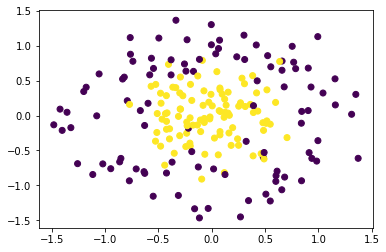

In [9]:
plt.scatter(circX[:,0], circX[:,1], c = circy)
plt.show()

In [10]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [11]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
fit = lrgd.fit(circX,circy)

In [12]:
circy

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1])

In [13]:
from sklearn.model_selection import train_test_split
newtrainX, newtestX, newtrainy, newtesty = train_test_split(circX, circy, test_size=.3)

In [14]:
predict = fit.predict(newtestX)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(predict, newtesty)

0.55

In [16]:
from sklearn.svm import SVC

In [17]:
mysvc1 = SVC()
mymodel1 = mysvc1.fit(newtrainX, newtrainy)
model1out = mymodel1.predict(newtestX)
model1out - newtesty

array([ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0])

In [18]:
accuracy_score(model1out,newtesty)

0.8666666666666667

In [19]:
data = np.genfromtxt('01-25prob1.csv',delimiter = ',')

FileNotFoundError: 01-25prob1.csv not found.

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
plt.scatter(data[:,0], data[:,1], c =  data[:,2])

In [ ]:
#not linealry separable by perceptron or adaline, so we can't use them 

# Q2

# linear kernel

In [ ]:
mysvc = SVC(kernel = 'linear')
model = mysvc.fit(data[:,0:2], data[:,2])

In [ ]:
boundry = DecisionBoundaryDisplay.from_estimator(model,data[:,0:2] )
plt.scatter(data[:,0], data[:,1], c =  data[:,2])

In [ ]:
boundry = DecisionBoundaryDisplay.from_estimator(model,data[:,0:2], response_method =  'predict' , alpha = 0.3)
plt.scatter(data[:,0], data[:,1], c =  data[:,2])

# Poly kernel

In [ ]:
mysvc = SVC(kernel = 'poly', degree = 4,coef0=3)
model = mysvc.fit(data[:,0:2], data[:,2])

In [ ]:
boundry = DecisionBoundaryDisplay.from_estimator(model,data[:,0:2] )
plt.scatter(data[:,0], data[:,1], c =  data[:,2])

In [ ]:
boundry = DecisionBoundaryDisplay.from_estimator(model,data[:,0:2], response_method =  'predict' , alpha = 0.3)
plt.scatter(data[:,0], data[:,1], c =  data[:,2])

# rbf kernel

In [ ]:
mysvc = SVC(kernel = 'rbf', C = 5)
model = mysvc.fit(data[:,0:2], data[:,2])

In [ ]:
boundry = DecisionBoundaryDisplay.from_estimator(model,data[:,0:2] )
plt.scatter(data[:,0], data[:,1], c =  data[:,2])

In [ ]:
boundry = DecisionBoundaryDisplay.from_estimator(model,data[:,0:2], response_method =  'predict' , alpha = 0.3)
plt.scatter(data[:,0], data[:,1], c =  data[:,2])

# Q3 MNIST

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels


In [ ]:
"""
Assuming you downloaded the data to a folder called 'fashion-mnist', which is a
subfolder of the folder you are currently working with, you can load
the 'train' images and classes with the following function call.
"""
myX, myy = load_mnist('Fashion','train')

In [ ]:
from PIL import Image 

In [ ]:
myxreshaped =myX.reshape((60000,28,28))  

In [ ]:
plt.imshow(myxreshaped[9])
plt.show()
print(myy[9])
print('Sandal')

In [ ]:
myshirty = myy[myy==6]

In [ ]:
myshirt = myX[myy==6,:]

In [ ]:
mysneakery = myy[myy==7]

In [ ]:
mysneaker = myX[myy==7,:]

In [ ]:
import numpy as np

In [ ]:
rand6  = np.random.randint(0,60000,size = 6)

In [ ]:
rand6

In [ ]:
fig,axs = plt.subplots(2,3)
axs[0,0].imshow(myxreshaped[rand6[0]])
axs[0,1].imshow(myxreshaped[rand6[1]])
axs[0,2].imshow(myxreshaped[rand6[2]])
axs[1,0].imshow(myxreshaped[rand6[3]])
axs[1,1].imshow(myxreshaped[rand6[4]])
axs[1,2].imshow(myxreshaped[rand6[5]])
plt.show()

In [ ]:
def sample(myX,myy,n):
    randn  = np.random.randint(0,myX.shape[0],size = n)
    newX = myX[randn,:]
    newy = myy[randn]
    return newX, newy

In [ ]:
shirtX, shirty = sample(myshirt,myy[myy==6],50)

In [ ]:
sneakerX, sneakery = sample(mysneaker,myy[myy==7],50)

# SVM Model

In [ ]:
fify = np.concatenate((shirty, sneakery))

In [ ]:
fifx = np.vstack((shirtX,sneakerX))

In [ ]:
mergeX = np.vstack((myshirt,mysneaker))

In [ ]:
mergey = np.concatenate((myshirty, mysneakery))

In [ ]:
mysvc1 = SVC()
mod = mysvc1.fit(mergeX, mergey)

In [ ]:
model1 = mod.predict(fifx)

In [ ]:
model1 - fify

In [ ]:
accuracy_score(model1,fify)

# Testmodel function

In [ ]:
def testmodel(X,y,n):
    randn  = np.random.randint(0,X.shape[0],size = n)
    trainX = myX[randn,:]
    trainy = myy[randn]

    testmodelSVC = SVC()
    testmodelmodel = testmodelSVC.fit(trainX, trainy)
    randn1  = np.random.randint(0,X.shape[0],size = n)
    testX = X[randn1,:]
    testy = y[randn1]
    model01 = testmodelmodel.predict(testX)
    accscore = accuracy_score(model01,testy)
    
    return accscore

In [ ]:
hahaX = np.vstack((myshirt,mysneaker))

In [ ]:
hahay = np.hstack((myshirty,mysneakery))

In [ ]:
testmodel(hahaX,hahay,50)

In [ ]:
testmodel(hahaX,hahay,100)

In [ ]:
testmodel(hahaX,hahay,500)

In [ ]:
testmodel(hahaX,hahay,700)

In [ ]:
testmodel(hahaX,hahay,1000)

In [ ]:
testmodel(hahaX,hahay,1500)

In [ ]:
testmodel(hahaX,hahay,2000)